# Analysis of pick up time outliers
**dlvry_time = time of order ---> time of delivery**

## Read data

In [1]:
DATA_READ_PATH = '/Users/calvinperumalla/personal project/Master - Data Scientist, ML Project 6'
import os

In [2]:
# load feature description --- sliced and diced data description wrote out pandas df loadable csv 
import pandas as pd
feature_description = pd.read_csv(os.path.join(DATA_READ_PATH, 'feature_description.csv'))[['feature', 'description']].drop_duplicates(subset='feature').to_dict()
index = list(feature_description['description'].keys())
feature_description = {feature_description['feature'][i]:feature_description['description'][i] for i in index}

In [155]:
# read data 
train_data = pd.read_csv(os.path.join(DATA_READ_PATH,'historical_data.csv'))

In [156]:
display(train_data)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [157]:
from collections import Counter
Counter(train_data['market_id']).most_common()

[(2.0, 55058),
 (4.0, 47599),
 (1.0, 38037),
 (3.0, 23297),
 (5.0, 18000),
 (6.0, 14450),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1

In [158]:
# making a model only on city (picking city with most data points)
train_data = train_data[train_data['market_id'] == 1.0]

In [159]:
# easy look up of description of feature
feature_description['total_outstanding_orders']

' Number of orders within 10 miles of this order that are currently being processed.'

In [160]:
# create a column of what we want to actually predict: the time taken to from the time of placing the order,
# to a dasher picking it up (pick_up_time): 
# Total_delivery_time = estimated_order_place_duration (Known) + pick_up_time + estimated_store_to_consumer_driving_duration(Known)

train_data['pick_up_time'] = (pd.to_datetime(train_data['actual_delivery_time']) - pd.to_datetime(train_data['created_at']))
train_data['pick_up_time'] = train_data['pick_up_time'].apply(lambda x: x.total_seconds()) - train_data['estimated_order_place_duration'] - train_data['estimated_store_to_consumer_driving_duration']

## Feature Engineering

Some ideas on features based on intuition
1. total_onshift_dashers
2. total_onshift_dashers - total_busy_dashers
3. total_items

### Distribution of predict variable

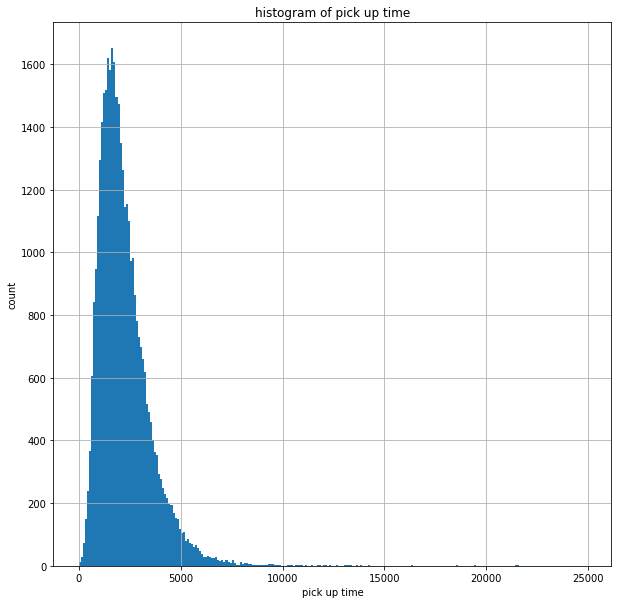

In [161]:

from matplotlib import pyplot as plt
w_o_noisy_pick_up = train_data[train_data['pick_up_time']>0]
bins = list(range(0, 25000, 100))
plt.figure(figsize=(10,10))
f = plt.hist(w_o_noisy_pick_up['pick_up_time'], bins=bins)
plt.title('histogram of pick up time')
plt.xlabel('pick up time')
plt.ylabel('count')
plt.grid()
plt.show()

In [162]:
noise_less_features =w_o_noisy_pick_up[
    (w_o_noisy_pick_up['subtotal'] > 0) & 
    (w_o_noisy_pick_up['total_items'] > 0) &
    (w_o_noisy_pick_up['total_outstanding_orders'] > 0) &
    (w_o_noisy_pick_up['total_onshift_dashers'] > 0)]

In [163]:
import numpy as np
def bin_maker(column, binsize=2):
    upper = int(np.percentile(column, 98))
    return list(range(0, upper, binsize))

### distribution of other features

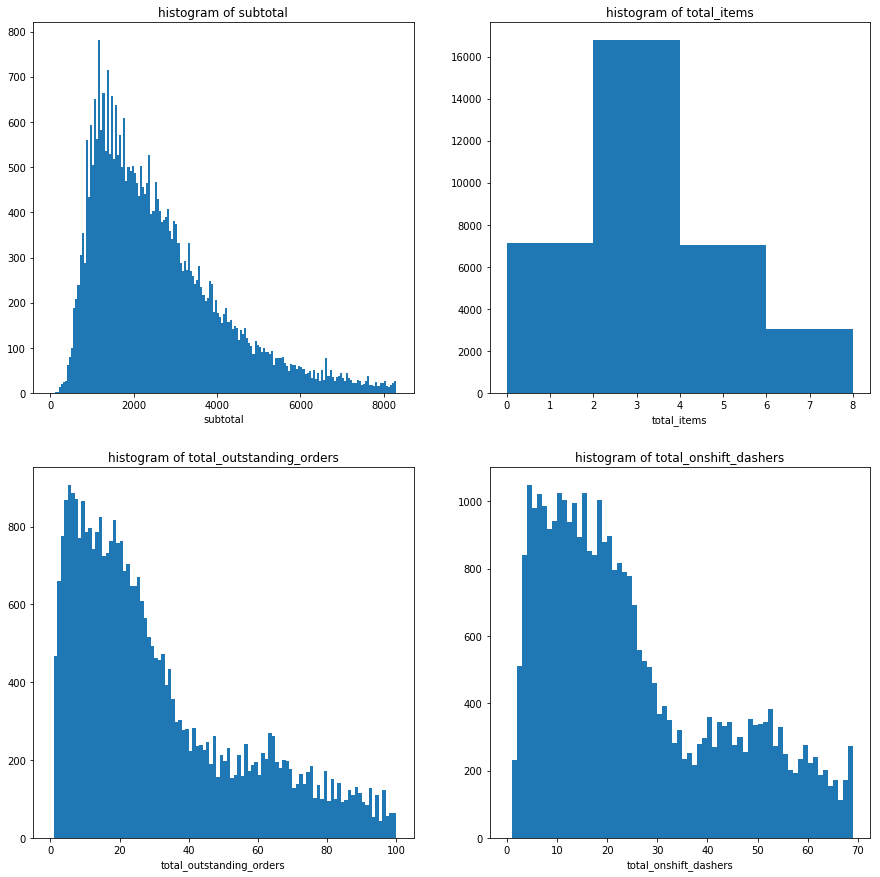

In [164]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
bins = bin_maker(noise_less_features['subtotal'], binsize=50)
plt.subplot(2,2,1)
f = plt.hist(noise_less_features['subtotal'], bins=bins)
plt.title('histogram of subtotal')
plt.xlabel('subtotal')

plt.subplot(2,2,2)
bins = bin_maker(noise_less_features['total_items'], binsize=2)
f = plt.hist(noise_less_features['total_items'], bins=bins)
plt.title('histogram of total_items')
plt.xlabel('total_items')

plt.subplot(2,2,3)
bins = bin_maker(noise_less_features['total_outstanding_orders'], binsize=1)
f = plt.hist(noise_less_features['total_outstanding_orders'], bins=bins)
plt.title('histogram of total_outstanding_orders')
plt.xlabel('total_outstanding_orders')

plt.subplot(2,2,4)
bins = bin_maker(noise_less_features['total_onshift_dashers'], binsize=1)
f = plt.hist(noise_less_features['total_onshift_dashers'], bins=bins)
plt.title('histogram of total_onshift_dashers')
plt.xlabel('total_onshift_dashers')

plt.show()

### Correlation between some features and predict variable

In [165]:
from scipy.stats import pearsonr

In [166]:
get_corr_str = lambda x, y: ('correlation for feature: {}'.format(pearsonr(x, y)))
def get_correlation(x, y='pick_up_time', df=noise_less_features, return_filtered_df=False):
    # removing noise
    
    upper_feature = int(np.percentile(df[x], 99))
    upper_predict_var = int(np.percentile(df[y], 99))
    noise_less_features_2 = df[(df[x]<upper_feature) & 
                               (df[y]<upper_predict_var)]
    return_packet = (pearsonr(noise_less_features_2[x], noise_less_features_2[y])[0], noise_less_features_2)
    return return_packet

In [167]:
print('{}: {}'.format('total_onshift_dashers', get_correlation('total_onshift_dashers')[0]))
print('{}: {}'.format('total_items', get_correlation('total_items')[0]))
print('{}: {}'.format('subtotal', get_correlation('subtotal')[0]))
print('{}: {}'.format('total_outstanding_orders', get_correlation('total_outstanding_orders')[0]))

total_onshift_dashers: -0.035518179216
total_items: 0.11240284686
subtotal: 0.148551304996
total_outstanding_orders: 0.105549902561


## Approach 3: Model Building and Validation based on City
1. Features: total_onshift_dashers, tota l_items, subtotal, total_outstanding_orders
2. Classifier: simple linear regression model
3. Validation: 4 fold validation
4. Metric: R2 score

In [168]:
from tqdm import tqdm
def filter_noise(df, features, noise_threshold=99):
    tmp_df = None
    for f in tqdm(features):
        if tmp_df is None:
            tmp_df = df
        upper = int(np.percentile(tmp_df[f], 99))
        tmp_df = tmp_df[tmp_df[f]< upper]
    return tmp_df

In [169]:
features = ['total_onshift_dashers', 'total_items', 'subtotal', 'total_outstanding_orders']
predict = ['pick_up_time']
all_vars = features + predict
data_set = filter_noise(noise_less_features[all_vars], all_vars)

100%|██████████| 5/5 [00:00<00:00, 264.90it/s]


#### Train linear regression model

In [170]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=5)
model_predictions = {}
model_performance = {}
model_run_index = 0
for train_index, test_index in tqdm(kfold.split(data_set)):
    model_run_index += 1
    regressor = LinearRegression()
    train_x = data_set.iloc[train_index][features]
    train_y = data_set.iloc[train_index][predict]
    model = regressor.fit(train_x, train_y)
    test_x = data_set.iloc[test_index][features]
    test_y = data_set.iloc[test_index][predict]
    predictions = model.predict(test_x)
    model_name = 'run_{}'.format(model_run_index)
    model_predictions[model_name] = zip(test_y['pick_up_time'], [p[0] for p in predictions])
    model_performance[model_name] = model.score(test_x, test_y)

5it [00:00, 68.72it/s]


In [171]:
# choosing best model
max(model_performance.items(), key=lambda x: x[1]) 

('run_1', 0.1713883079644145)

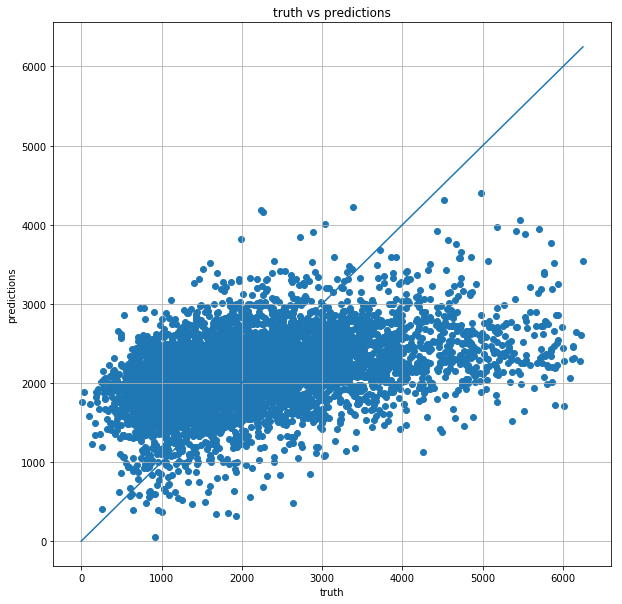

In [172]:
true, pred = zip(*model_predictions['run_1'])
mx = int(max(max(true), max(pred)))
plt.figure(figsize=(10, 10))
plt.plot(list(range(mx)), list(range(mx)))
plt.scatter(true, pred)
plt.title('truth vs predictions')
plt.xlabel('truth')
plt.ylabel('predictions')
plt.grid()
plt.show()

Making per city model is better than other models
but still suffers from the problem of mis predicting extremes (specifically under predicting longer pick up times and over predicting shorter pick up times)
In other words the chosen features do not scale well with the predict variable
(Low variance in features)